In [1]:
import matplotlib.pyplot as plt
import numpy as np
from perlin_numpy import (
    generate_perlin_noise_2d, generate_fractal_noise_2d
)

# Summary

We use a 2km by 2km grid constructed out of 5m squares

So the grid size is 200 x 200.

In [2]:
import math

SQUARE_SIZE = 5  # meters
GRID_SIZE = (200, 200)  # 200 squares of SQUARE_SIZE meters

np.random.seed(0)
noise = generate_perlin_noise_2d(GRID_SIZE, (
    4, 4)) * 100 + 200  # TODO keep between a range such as minimum height and maximum height

np.random.seed(22)
start, target = np.random.rand(2, 2) * 200

# TODO Ed, continue from here
def plot_terrain(noise):
    plt.imshow(noise, cmap='Blues', interpolation='lanczos')
    plt.colorbar()
    plt.scatter(*(list(zip(*[start, target]))[::-1]), c=['red'])


# plot_terrain(noise)

def gradual_noise(noise: np.array, d) -> np.array:
    minn, maxx = noise.min(), noise.max()
    buckets = [i for i in range(int(minn), int(maxx), d)]
    buckets.append(int(maxx))
    find_bucket = lambda x: (x - minn) // d
    find_new_value = lambda x: minn + d * find_bucket(x)
    # print(buckets)
    # print(noise[0, 0],
    #       find_bucket(noise[0, 0]),
    #       find_new_value(noise[0, 0]))
    transform = np.vectorize(find_new_value)
    return transform(noise), buckets

# def point_to_altitude(noise, xy):
#     i,j = int(xy[0]), int(xy[1])
#     def closest(*pts):
#         return min(lambda ij: eucl(ij, xy),
#                    pts)
#         return
#     i, j = closest((i,j), (i,j+1), (i+1, j), (i+1,j+1))
#
#     return closest()

In [3]:
import itertools
from collections import defaultdict

class Graph:
    def __init__(self, num_nodes=None):
        self.num_nodes = num_nodes
        self.edges = defaultdict(set)
    def add_edge(self, node1: int, node2: int):
        if not self.num_nodes:
            raise Exception("num_nodes was not set")
        if not 0 <= node1 < self.num_nodes:
            raise Exception(f"node1={node1} should be between 0 and {self.num_nodes - 1}")
        if not 0 <= node2 < self.num_nodes:
            raise Exception(f"node2={node2} should be between 0 and {self.num_nodes - 1}")
        if node1 == node2:
            return
        self.edges[node1].add(node2)
        self.edges[node2].add(node1)

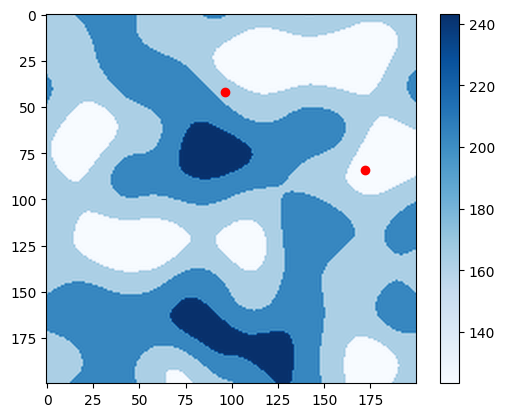

Test that all pieces were used:
20
76934


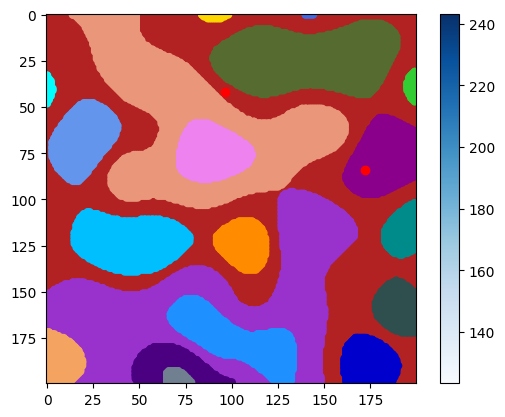

In [4]:
def generate_area_sets(gradual_noise: np.array) -> tuple[list[set], Graph, dict]:
    areas = []
    used = set()

    def neighbors(i: int, j: int, maxi: int, maxj: int) -> list[tuple[int, int]]:
        coords = [(i-1,j) if i > 0 else None,
                  (i,j-1) if j > 0 else None,
                  (i,j+1) if j < maxj - 1 else None,
                  (i+1,j) if i < maxi - 1 else None]
        return list(filter(lambda x: x is not None,
                           coords))


    def extract_area(mat: np.array, i: int, j: int,
                     used: set[tuple[int, int]]):
        if (i, j) in used:
            return []

        q = [(i, j)]

        area = [(i, j)]

        while len(q):
            # print(used, '\n', i, j)
            i, j = q.pop(-1)
            # add to area and mark coords as used:
            area.append((i, j))
            used.add((i, j))

            for i2,j2 in neighbors(i,j,*GRID_SIZE):
                if (i2,j2) not in used and \
                        math.isclose(mat[i,j], mat[i2,j2]):
                    q.append((i2,j2))
            # if i > 0 and math.isclose(mat[i - 1, j], mat[i, j]) and \
            #         (i - 1, j) not in used:
            #     q.append((i - 1, j))
            # if j > 0 and math.isclose(mat[i, j - 1], mat[i, j]) and \
            #         (i, j - 1) not in used:
            #     q.append((i, j - 1))
            # if i < GRID_SIZE[0] - 1 and math.isclose(mat[i + 1, j], mat[i, j]) and \
            #         (i + 1, j) not in used:
            #     q.append((i + 1, j))
            # if j < GRID_SIZE[1] - 1 and math.isclose(mat[i, j + 1], mat[i, j]) and \
            #         (i, j + 1) not in used:
            #     q.append((i, j + 1))
        # ...
        return area

    coord_to_area = {}

    for i, j in itertools.product(range(GRID_SIZE[0]),
                                  range(GRID_SIZE[1])):
        area = extract_area(gradual_noise, i, j, used)
        if area:
            # Also map all coords to area
            idx = len(areas)
            for coord in area:
                coord_to_area[coord] = idx
            # append area:
            areas.append(area)

    # create graph
    graph = Graph(len(areas))
    for coord1 in itertools.product(range(GRID_SIZE[0]),
                                  range(GRID_SIZE[1])):
        idx_area_1 = coord_to_area[coord1]
        for coord2 in neighbors(*coord1,*GRID_SIZE):
            idx_area_2 = coord_to_area[coord2]
            graph.add_edge(idx_area_1, idx_area_2)


    return areas, graph, coord_to_area


# def selected_tiers(noise: np.array, buckets) -> np.array:
#     # create sets for each zone:
#     possible_heights = set(buckets)
#     print(possible_heights)
#     areas = generate_area_sets(noise)
#     return areas  # NO

# regular:
noise_map, buckets = gradual_noise(noise, 40)
plot_terrain(noise_map)
plt.show()

# extra:
areas, graph, coord_to_area = generate_area_sets(noise_map)

print('Test that all pieces were used:',
      len(areas),
      sum([len(area) for area in areas]),

      sep='\n')

plot_terrain(noise_map)
colors = ['firebrick',
          'darksalmon',
          'gold',
          'royalblue',
          'darkolivegreen',
          'limegreen',
          'cyan',
          'cornflowerblue',
          'darkmagenta',
          'violet',
          'darkorchid',
          'darkcyan',
          'deepskyblue',
          'darkorange',
          'darkslategray',
          'dodgerblue',
          'sandybrown',
          'mediumblue',
          'indigo',
          'slategrey',
          'lightcoral',
          'darkseagreen']
for i, area in enumerate(areas):
    area = [pt[::-1] for pt in area]
    plt.scatter(*zip(*area), edgecolors='none', c=[colors[i]])
# plt.axis('equal')
plt.scatter(*(list(zip(*[start, target]))[::-1]), c=['red'])
plt.show()
# TODO what other interpolations are used for perlin noise?

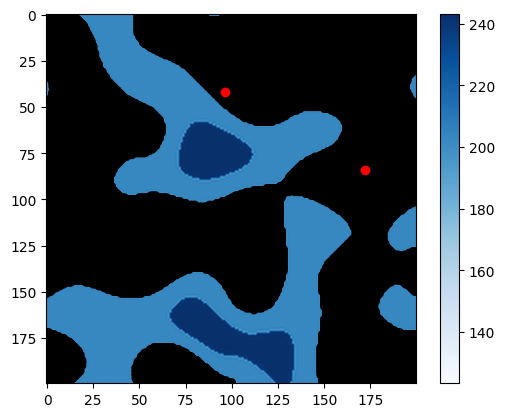

In [5]:
pts = [(int(i), int(j))
       for i, j in [start, target]]
idx1, idx2 = [coord_to_area[p]
              for p in pts]

alts = [noise_map[pt]
        for pt in pts]
alt1, alt2 = alts
alt_min = min(alts)
alt_max = max(alts)
selected_areas = [area for area in areas
                  if alt_min <= noise_map[area[0]] <= alt_max]

# TODO implement a plotting function
plot_terrain(noise_map)
colors = ['firebrick',
          'darksalmon',
          'gold',
          'royalblue',
          'darkolivegreen',
          'limegreen',
          'cyan',
          'cornflowerblue',
          'darkmagenta',
          'violet',
          'darkorchid',
          'darkcyan',
          'deepskyblue',
          'darkorange',
          'darkslategray',
          'dodgerblue',
          'sandybrown',
          'mediumblue',
          'indigo',
          'slategrey',
          'lightcoral',
          'darkseagreen']
for i, area in enumerate(selected_areas):
    area = [pt[::-1] for pt in area]
    plt.scatter(*zip(*area), edgecolors='none', c=['black'])
# plt.axis('equal')
plt.scatter(*(list(zip(*[start, target]))[::-1]), c=['red'])

plt.show()

# Random paths

We choose a series of random paths using bezie curves, which is probably much faster than any navigation algorithm.

Strategies:
1. Choose random points, various degrees, and use a learning algorithm
2. Choose better initial points by running a test which will detect corridors, may be even a CV algorithm, or just group by bins the height to create another type of surface, and use a navigation algorithm which prefers traversing same-height-terrain
3. Also discover corridors
For various results, we'll use different degrees.

## 1 Random Bezier curves

In [6]:
# TODO: compile package https://packaging.python.org/en/latest/tutorials/packaging-projects/
#       from pybezier import *
def de_casteljau(pts: np.array, t: float):
    if len(pts) == 1:
        return pts[0]
    else:
        new_pts = []
        for a, b in zip(pts, pts[1:]):
            new_pts.append(
                (1 - t) * a + t * b
            )
        return de_casteljau(new_pts, t)


def curve_length(pts: np.array) -> float:
    deltas = np.diff(pts, axis=0)
    return np.sum(
        np.hypot(deltas[:, 0], deltas[:, 1])
    )


def generate_bezier_curve(pts: np.array, min_step=5):
    CURVE_LEN = int(np.pi * curve_length(pts) // min_step)
    ts = np.linspace(0, 1, CURVE_LEN + 1)
    return np.array([
        de_casteljau(pts, t)
        for t in ts
    ])


bcurves = [
    [
        np.array([
            start,
            *inner_waypoints,
            target
        ])
        for inner_waypoints in np.random.rand(10, deg - 1, 2) * 200
    ] for deg in [2, 3, 4]
]
bcurves = [
    item for sublist in bcurves for item in sublist
]

plot_terrain()

for waypoints in bcurves:
    bcurve = generate_bezier_curve(waypoints)
    plt.plot(*zip(*bcurve))

# After this, we could create a fitness function to decide which path is the greatest as elevation variance,
#  length, radii etc.

# for deg in [2,3,4]:
#     for inner_waypoints in np.random.rand(10, deg-1, 2) * 200:
#         waypoints = np.array([
#             start,
#             *inner_waypoints,
#             target
#         ])
#         bcurve = generate_bezier_curve(waypoints)
#
#         plt.plot(*zip(*bcurve))
#         print(waypoints)

TypeError: plot_terrain() missing 1 required positional argument: 'noise'

## 2 Corridors and Stratified Surface

Choose better initial points by running a test which will detect corridors, may be even a CV algorithm, or just group by bins the height to create another type of surface, and use a navigation algorithm which prefers traversing same-height-terrain

In [ ]:
noise